# **<font color=#FF3399> Gabarito Challenge : Probabilidade e Amostragem </font>**

Bootcamp Data Analytics & Tech Minas 2023 

WoMakersCode

-  Desafio 1: Entendendo o Consumidor
-  Desafio 2: Determinando o Estoque de Segurança


In [ ]:
#### Importando os pacotes que serao utilizados nos dois desafios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assimétricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive



## **<font color=#FF3399> Desafio 1: Entendendo o Consumidor: </font>**

Contexto : 


Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,
pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as
diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar
melhor os seus anúncios. Para isso, eles te enviaram a base de dados
(desafio_01_consumidor.csv). Como você poderia ajudá-los?

Para responder esse desafio:
A base de dados: desafio_01_consumidor.csv contém informações de seus clientes
(anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o
dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

In [ ]:
### Antes de comecarmos a responder as perguntas vamos ler a base disponibilizada.

df = pd.read_csv("/content/drive/MyDrive/WoMakers/BOOTCAMP/Desafios/desafio-01-consumidor.csv")

In [ ]:
df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


#### Seguindo o Passo a Passo:
1. Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia
  - a. Identifique as distribuições
  - b. Plote histogramas / boxplots


In [ ]:
### Primeiro vamos analisar quantos data points temos no pré vs no pós pandemia:
df["pre-pandemia"].value_counts() 

0    102
1    101
Name: pre-pandemia, dtype: int64


> 1.1 IDADE



Text(0.5, 1.0, 'Histograma comparativo da distribuiçao de idade pré x pós pandemia')

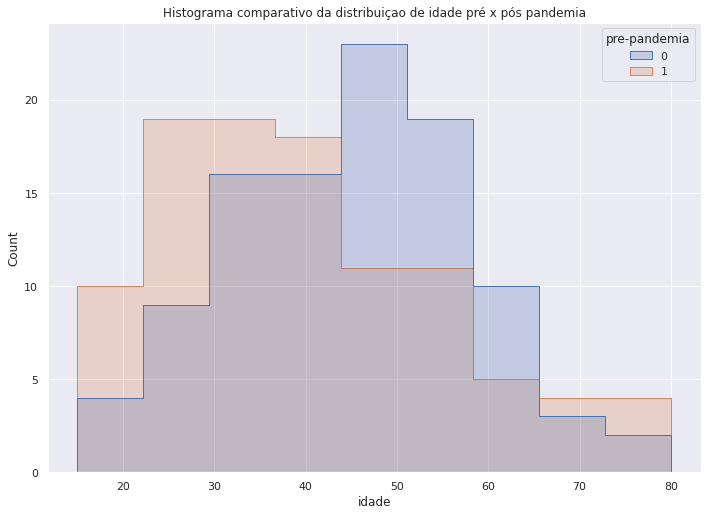

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="idade", hue="pre-pandemia",  element="step").set_title("Histograma comparativo da distribuiçao de idade pré x pós pandemia")

Pela Analise visual inicial conseguimos ver que: os dados parecem seguir uma distribuicao normal simétrica no pós pandemia, enquanto que no pré pandemia essa distribuicao era assimétrica positiva ou à direita.

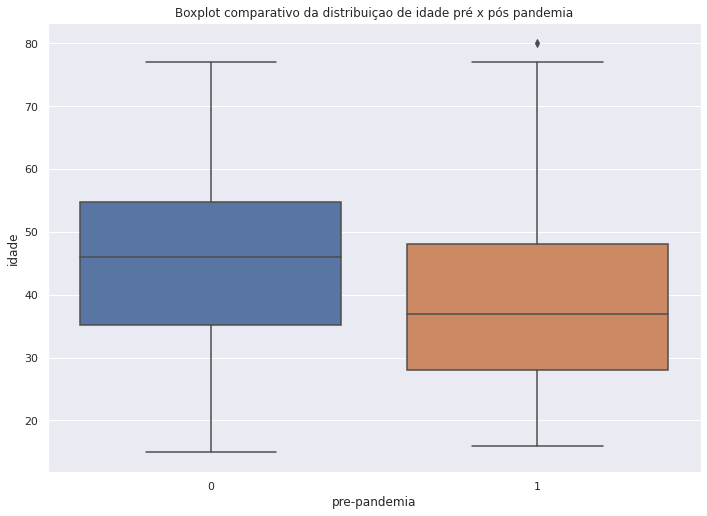

In [ ]:
ax = sns.boxplot(x="pre-pandemia", y="idade", data=df).set_title("Boxplot comparativo da distribuiçao de idade pré x pós pandemia")

Pela Análise visual inicial conseguimos ver que: No pré pandemia pessoas mais jovens eram o público alvo, com uma mediana em torno de 39 anos. No pós pandemia a mediana parece ter se deslocado apx 10 anos. 


> 1.2 RENDA


Text(0.5, 1.0, 'Histograma comparativo da distribuiçao de renda pré x pós pandemia')

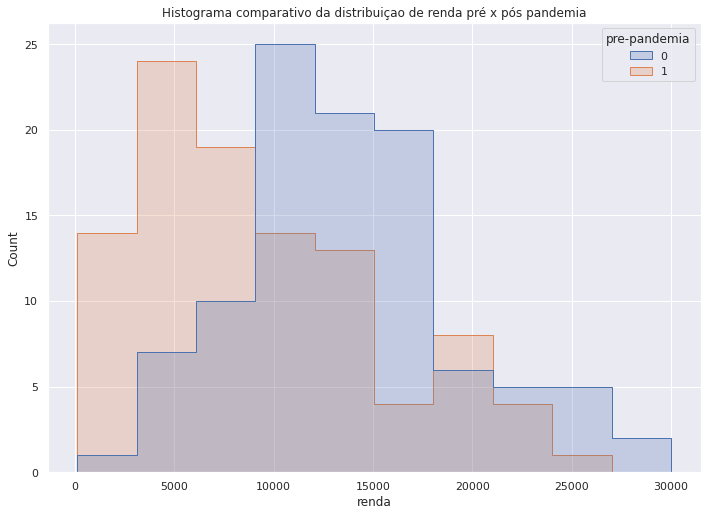

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df, x="renda", hue="pre-pandemia",  element="step").set_title("Histograma comparativo da distribuiçao de renda pré x pós pandemia")

Novamente, podemos perceber olhando o histograma comparativo que a distribuicao no pré pandemia era assimétrica positiva, enquanto que no pós pandemia, tornou-se simétrica. Isso nos dá um possivel indicio de uma possivel correlacao entre idade e renda.

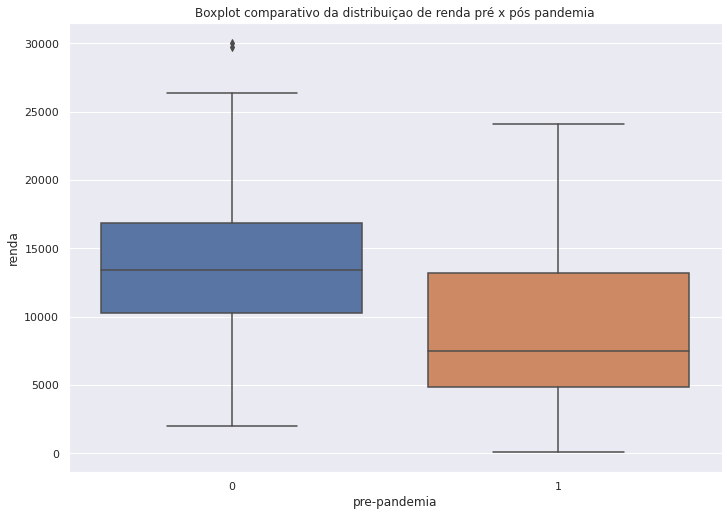

In [ ]:
ax = sns.boxplot(x="pre-pandemia", y="renda", data=df).set_title("Boxplot comparativo da distribuiçao de renda pré x pós pandemia")

No pré pandemia, podemos ver que a renda mediana era mais concentrada em faixas de 5000 a 7000 reais, no pós pandemia, a renda está bem mais alta. O que poderia ser consequencia de um redirecionamento da marca para produtos mais luxuosos ou mais caros.


> 1.3 REGIÃO


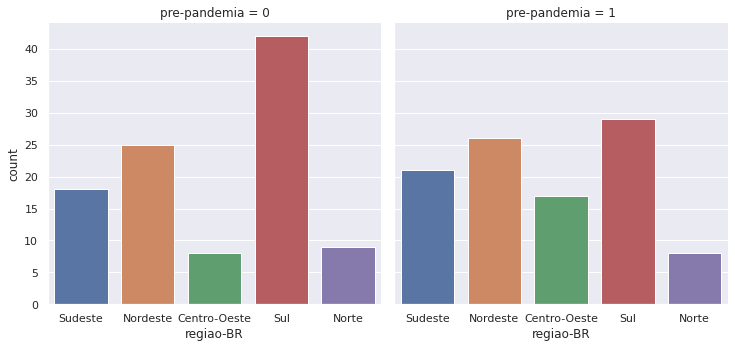

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="regiao-BR", col="pre-pandemia", col_wrap=4,
                data=df,
                kind="count")

Pelo gráfico, conseguimos ver que a proporção de clientes entre as regioes mudou bastante do pre x pos pandemia. No pre pandemia tinhamos uma distribuicao mais mixta entre as regioes, exceto o norte. No pos pandemia, tivemos uma diminuicao na proporcao de clientes do centro oeste.

In [ ]:
df_perc_regiao = pd.DataFrame(
    {'Count_pre-pandemia': pd.value_counts(df.loc[df["pre-pandemia"]==1]['regiao-BR']) , 
     'Porcentagem_pre-pandemia':pd.value_counts(df.loc[df["pre-pandemia"]==1]['regiao-BR'], normalize = True)*100,
     'Count_pos-pandemia': pd.value_counts(df.loc[df["pre-pandemia"]==0]['regiao-BR']) , 
     'Porcentagem_pos-pandemia':pd.value_counts(df.loc[df["pre-pandemia"]==0]['regiao-BR'], normalize = True)*100 
     }
     )
df_perc_regiao

,Count_pre-pandemia,Porcentagem_pre-pandemia,Count_pos-pandemia,Porcentagem_pos-pandemia
Centro-Oeste,17,16.831683,8,7.843137
Nordeste,26,25.742574,25,24.509804
Norte,8,7.920792,9,8.823529
Sudeste,21,20.792079,18,17.647059
Sul,29,28.712871,42,41.176471



> 1.3 PRODUTO

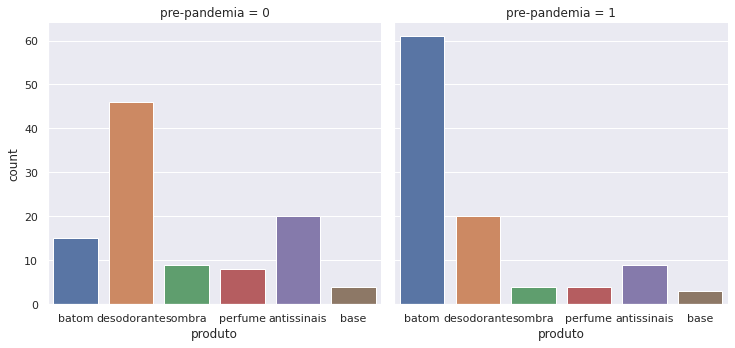

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="produto", col="pre-pandemia", col_wrap=4,
                data=df,
                kind="count")

In [ ]:
df_perc_produto = pd.DataFrame(
    {'Count_pre-pandemia': pd.value_counts(df.loc[df["pre-pandemia"]==1]['produto']) , 
     'Porcentagem_pre-pandemia':pd.value_counts(df.loc[df["pre-pandemia"]==1]['produto'], normalize = True)*100,
     'Count_pos-pandemia': pd.value_counts(df.loc[df["pre-pandemia"]==0]['produto']) , 
     'Porcentagem_pos-pandemia':pd.value_counts(df.loc[df["pre-pandemia"]==0]['produto'], normalize = True)*100 
     }
     )
df_perc_produto

,Count_pre-pandemia,Porcentagem_pre-pandemia,Count_pos-pandemia,Porcentagem_pos-pandemia
antissinais,9,8.910891,20,19.607843
base,3,2.970297,4,3.921569
batom,61,60.396040,15,14.705882
desodorante,20,19.801980,46,45.098039
perfume,4,3.960396,8,7.843137
sombra,4,3.960396,9,8.823529


Conclusão: A distribuição entre o mix de produtos, mudou bastante com a pandemia. No pré pandemia as pessoas compravam mais produtos mais baratos, como batom (56%) no pos pandemia o produto mais comprado foi desodorante (45%) e cremes antissinais (19%).


> **2)  Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)**

Para provar que duas distribuições sao diferentes, ou que a distribuição dos dados podemos utilizar testes de hipóteses!

O teste t ve a diferenca entre médias, mas assume que a distribuiçáo dos dados é normal. (nesse caso a distribuicao é normal entao poderia ser utilizado)

Porém no seu dia a dia como analista, esse teste geralmente é inviável, pois muitas vezes a distribuicao dos dados nao é normal! Entao o teste mais amplamente utilizado e conhecido no ambiente profissional é o teste KS (Kolmogorov-Smirnov).

*Teste t como funciona?*

Nese caso a hipotese do teste é de que a média da distribuicao1 = média da distribuicao 2.

Conforme ja dito, pressupoe que os dados tenham distribuicao normal! e que a variancia populacional (nao da amostra) seja a mesma.




In [ ]:
from scipy import stats

In [ ]:
renda_pre = df.loc[df["pre-pandemia"]==1]["renda"]
renda_pos = df.loc[df["pre-pandemia"]==0]["renda"]
stats.ttest_ind(renda_pre, renda_pos)

Ttest_indResult(statistic=-5.8539120969193865, pvalue=1.9295804375445438e-08)

Conclusao: As duas distribuicoes, tem médias diferentes

*Teste KS como funciona?*

Nesse caso o teste KS, vai verificar a distancia da distribuicao cumulativa de 2 amostras de dados. Se esses dados possuirem uma distancia grande na distribuicao cumulativa significa que vem de distribuicoes diferentes. 

Esse teste é MUITO utilizado para teste e monitoramento de variáveis, e para decisao de retreinar modelos de machine learning!



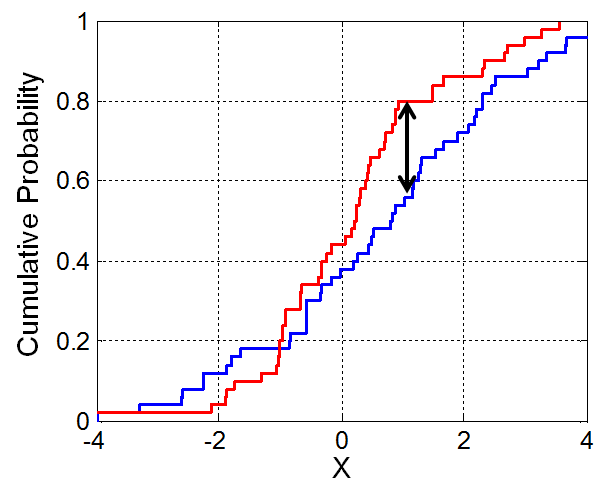

Na prática, quanto maior a distancia entao maior a probabilidade de as distribuicoes serem diferentes. 

A hipótese nula do teste é : Nao há diferenca entre as duas distribuicoes.
Entao nesse caso se o p-valor for < 0.05 as distribuicoes sao diferentes.

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(renda_pre, renda_pos)

Ks_2sampResult(statistic=0.4270044651523976, pvalue=9.531748723645705e-09)


> **3) Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?**



Existem diferentes formulas para chegar no tamanho da amostra. A Fórmula de Slovin é:

### $$n0 = \frac{1}{e^2}$$
### $$n = \frac{N*n0}{N+n0}$$

Sendo:

- N = tamanho da população
- e = erro tolerável
- n0 = aproximacao do tamanho da amostra

In [ ]:
def calcular_tamanho_amostra_slovin(N,e):
  n0 = 1/(e**2)
  n = (N*n0)/(N + n0)
  return round(n)

In [ ]:
calcular_tamanho_amostra_slovin(N = 100000,e=0.02)

2439

In [ ]:
calcular_tamanho_amostra_slovin(N = 100000,e=0.1)

100

Existem também outras formulas para o cálculo do tamanho da amostra, considerando a tabela de distribuicao normal e nivel de confianca, como por exemplo a fórmula:

### $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

sendo:
- s o desvio padrao da variavel que queremos analisar
- z o score da distribuicao normal


In [ ]:
# Inputs
N = 100000
z = norm.ppf((0.5 + (0.95 / 2)))
s = df["idade"].std() # desvio padrao da amostra
e = 0.02 

In [ ]:
def calcular_tamanho_amostra_n(N,z,s,e):
  return round(((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1))))

## **<font color=#FF3399> Desafio 2: Calculando o Estoque de Seguranca</font>**

Contexto : 

Para entender esse desafio, é importante primeiramente ter bem claro os conceitos de negócio abordados! 



Repassando a fórmula Mãe do estoque de seguranca:

- O estoque de segurança pela fórmula abaixo vai depender essencialmente de:
  - lead time médio em dias
  - variabilidade do lead time
  - variabilidade da demanda
  - demanda média (EM DIAS)

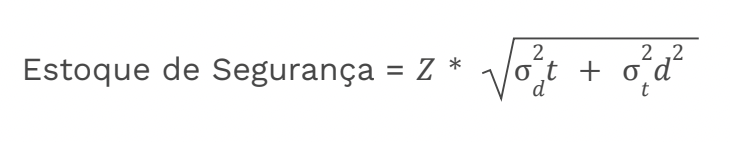


In [ ]:
### Antes de comecarmos a responder as perguntas vamos ler a base disponibilizada.

df2 = pd.read_csv("/content/drive/MyDrive/WoMakers/BOOTCAMP/Desafios/desafio_02_estoque.csv")

In [ ]:
df2.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5




> 2.1 Analise os dados das vendas e do lead time. Eles seguem uma distribuição
normal? Que características você identificou para chegar a essa conclusão?



Primeiro vamos plotar e analisar se parece uma distribuição normal as vendas semanais do dataset

Text(0.5, 1.0, 'Distribuicao das vendas semanais de iogurte')

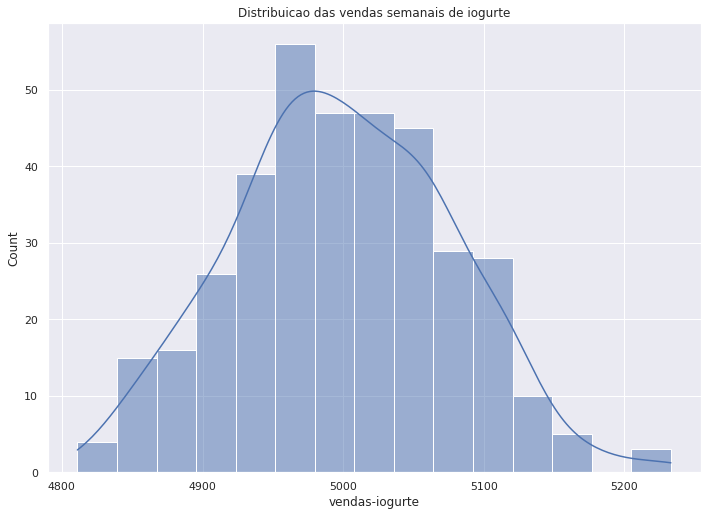

In [ ]:
### PLOT DAS VENDAS
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df2, x="vendas-iogurte", kde=True).set_title("Distribuicao das vendas semanais de iogurte")

In [ ]:
media_demanda = df2['vendas-iogurte'].mean()
desviop_demanda = df2['vendas-iogurte'].std()
print("Média: {} ".format(media_demanda))
print("Desvio Padrao: {} ".format(desviop_demanda))

Média: 4999.1702702702705 
Desvio Padrao: 77.28506821873452 


 Vamos em seguida analisar o mesmo para o lead-time

Text(0.5, 1.0, 'Distribuicao do lead-time')

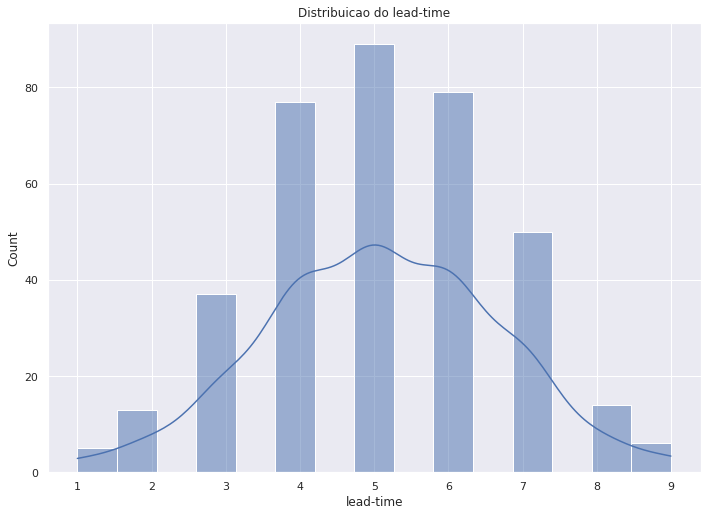

In [ ]:
### PLOT LEAD TIME
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df2, x="lead-time", kde=True).set_title("Distribuicao do lead-time")

In [ ]:
media_leadtime = df2['lead-time'].mean()
desviop_leadtime = df2['lead-time'].std()
print("Média: {} ".format(media_leadtime))
print("Desvio Padrao: {} ".format(desviop_leadtime))

Média: 5.094594594594595 
Desvio Padrao: 1.5787281673958218 


Visualmente os dados parecem seguir uma distribuicao normal com média em torno de 500 e desvio padrao 77.3

Ainda na pré analise podemos refetir. Será que essa distibuicao pode ter mudado com o tempo? Vamos garantir primeiro que isso nao aconteceu

In [ ]:
df2["data"]= pd.to_datetime(df2["data"], format = "%Y-%m-%d")

Text(0.5, 1.0, 'Vendas semanais de iogurte ao longo do tempo')

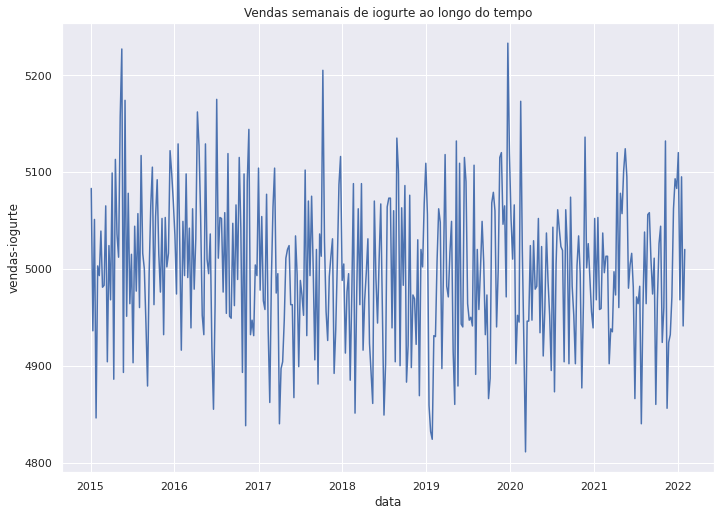

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df2, x="data", y="vendas-iogurte").set_title("Vendas semanais de iogurte ao longo do tempo")

Nesse caso os dados nao parecem ter uma tendencia. Estao bem flutuando ao redor da média, o que chamamos de série estácionária. A volatilidade parece alta tambem , pois estamos com granularidade semanal

Para fazer uma verificacao mais acurada se temos uma distribuicao normal podemos fazer uma analise via QQ-Plot e também utilizar testes de hipóteses, como o teste KS ja mencionado aqui

#### Analise de QQ Plot
tem por objetivo comparar os quantis da distribuicao normal teorica com o da distribuicao dos seus dados.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


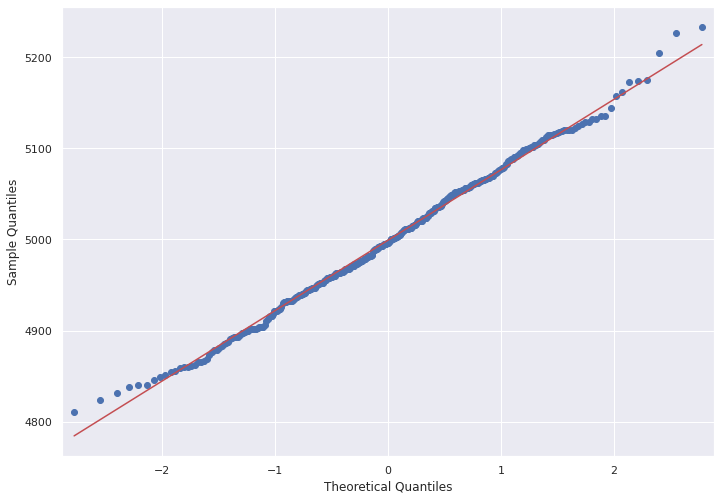

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df2['vendas-iogurte'], line='s')
plt.show();

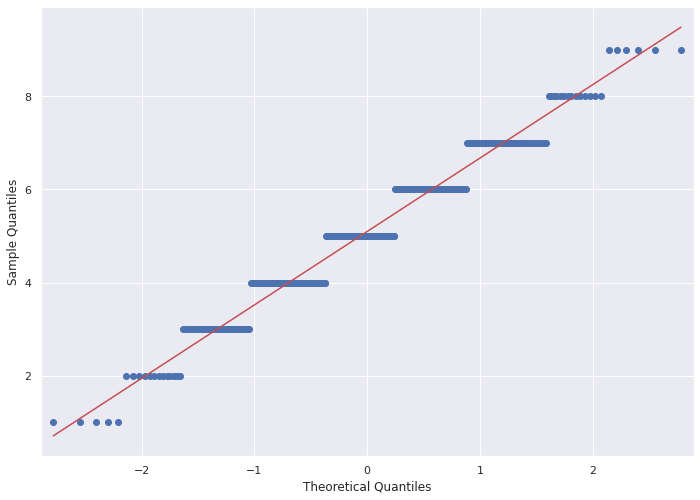

In [ ]:
qqplot(df2['lead-time'], line ='s')
plt.show();

Conclusão: Analisando vizualmente via histograma e qqplots podemos perceber que a distribuicao do lead-time e a as vendas de iogurte seguem uma distribuicao normal.



> 2. Assuma que:
-  Os dados seguem uma distribuição normal.
- O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%
- O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

> **Calcule, com os dados fornecidos, o estoque de segurança desejado.**





Utilizando a fórmula acima do estoque de segurança, vamos obter agora cada um dos inputs
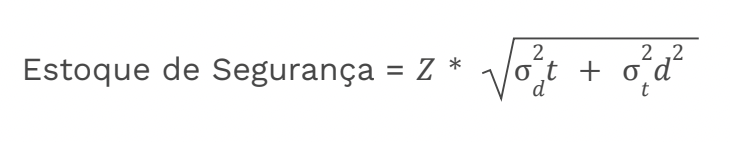

In [ ]:
x = np.arange(4800,5300,0.5)

def draw_z_score(x, mu, sigma, title, service_level):
    z0 = st.norm.ppf(service_level, loc=media_demanda, scale=desviop_demanda)
    y = st.norm.pdf(x, mu, sigma)
    z = x[x<z0]
    plt.plot(x, y)
    plt.fill_between(z, 0, st.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

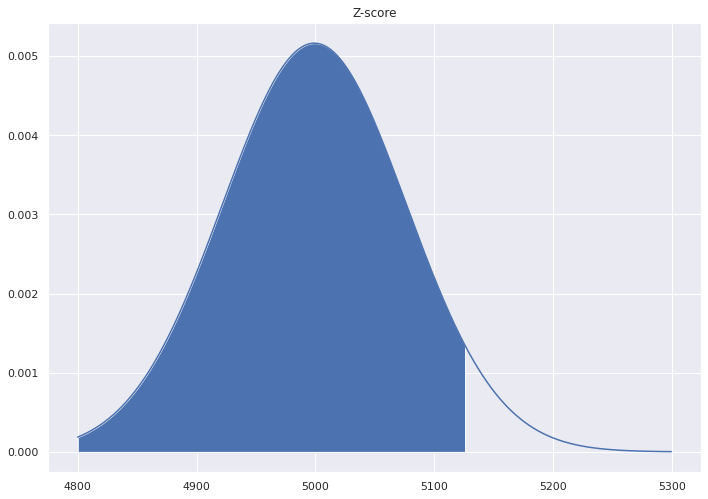

In [ ]:
draw_z_score(x,d, sigma_d, "Z-score", service_level = 0.95)

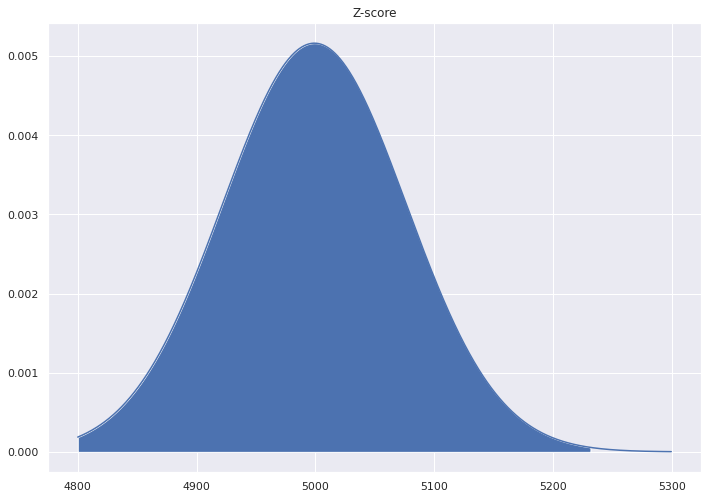

In [ ]:
draw_z_score(x,d, sigma_d, "Z-score", service_level = 0.9987)

Z-score: Irá de dizer o quao distante da média voce está em desvios padroes.

o nivel de serviço nesse caso é diferente do nível de confiança que estamos acostumados, porque ele é unicaudal. O objetivo aqui é decidir quanto de estoque A MAIS devemos colocar. Entao nao precisamos nos preocupar com a outra cauda da distribuicao.

In [ ]:
## A título de curiosidade: quantos iogurtes seriam necessarios assumindo o nivel de servico de 0.9987 e que a entrega fosse instantanea e nao tivesse nenhum risco associado
st.norm.ppf(0.9987, loc=d, scale=sigma_d)

5231.910679433491

In [ ]:
import scipy.stats as st
st.norm.ppf(0.9987) ## Essa é a solucao correta nesse caso , porque a distribuicao é UNICAUDAL

3.011453758499792

In [ ]:
import scipy.stats as st
st.norm.ppf(0.5 + (0.9987/2)) ### Essa seria a solucao se estivessemos analisando uma distribuicao BI-CAUDAL. ou essa : st.norm.ppf((1+0.9987)/2)

3.21597976078809

In [ ]:
import math
def calcula_estoque_seguranca(Z, sigma_d, t, sigma_t, d):
  return math.ceil(Z*((sigma_d**2)*t + (sigma_t**2)*(d**2))**(1/2))

In [ ]:
sigma_d = df2["vendas-iogurte"].std()
sigma_t = (df2["lead-time"]/7).std() ## deve ser convertido por semana, pois os dados da demanda sao semanais
t = (df2["lead-time"]/7).mean() ## deve ser convertido por semana,..
d = df2["vendas-iogurte"].mean()
import scipy.stats as st
Z = st.norm.ppf(.9987)

In [ ]:
### adicionando o componente de risco presente na formula (desvio padrao + o lead time) chegamos ao valor correto de:
calcula_estoque_seguranca(Z, sigma_d, t, sigma_t, d)

3402

o valor informado, pode parecer alto, mas considerando que temos um lead time médio de 5 dias e a entrega é feita em menos de 1 semana ele faz sentido, é aproximadamente (5/7)*5000.